MARKETING ANALYTICS PROJECT

Context :-

The accompanying dataset has data about leads generated by a Travel Aggregator in the last six months along with information about them and whether they ended up converting (ie – booking a trip).
You need to use this dataset to build a propensity model that the sales team can use to target new leads.

Data Dictionary :-

-	RowNumber – row identifier
-	LeadId – id for the lead
-	Surname – prospect surname
-	months_since_lead_gen – number of months since lead was generated
-	lead_gen_channel – channel through which lead was generated
-   Gender – gender of customer Age - age of customer
-	City – city of customer
-	airline_loyalty_tier – whether customer belongs to any airline loyalty program and if so which tier
-   no_of_family_members – number of family members of customer
-	is_6M_enquiry – whether customer has made a holiday enquiry in the last six months
-	is_3M_active – whether customer has been active on the website / app in the last six months
-	Converted_y_N – whether booked

Requirements:-
-	Derive any additional variables and perform feature engineering as you deem fit 
-	The outcome of the modelling exercise needs to be rank ordering of customers into deciles based on propensity / probability to convert. Provide decile wise expected conversion rate on the test data
-	Provide 1-2 lines of brief justification for choice of algorithm, features and testing method employed
-	Save the train and test data as csv files and final model as a pickle object
-	Save your code as .ipynb or .py file or .txt file 
-	Share the code, csv files and model pickle object

In [1]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the csv file and storing it in a dataframe
df=pd.read_csv('Dataset.csv')

In [3]:
df.head()

,RowNumber,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N
0,1,15634602,Hargrave,4,Networks,Female,42,Bangalore,None,1,1,1,1
1,2,15647311,Hill,4,Organic,Female,41,Hyderabad,None,1,1,0,0
2,3,15619304,Onio,3,Networks,Female,42,Mumbai,Platinum,3,0,1,1
3,4,15701354,Boni,4,Networks,Female,39,Hyderabad,None,2,0,0,0
4,5,15737888,Mitchell,6,Organic,Female,43,Bangalore,Base,1,1,1,0


In [4]:
df.tail()

,RowNumber,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N
9995,9996,15606229,Obijiaku,5,Networks,Male,39,Chennai,None,2,0,1,0
9996,9997,15569892,Johnstone,3,Networks,Male,35,Cochin,None,1,1,1,0
9997,9998,15584532,Liu,5,Networks,Female,36,Surat,None,1,1,0,1
9998,9999,15682355,Sabbatini,5,Direct,Male,42,Chandigarh,None,2,0,1,1
9999,10000,15628319,Walker,5,Networks,Female,28,Delhi,Silver,1,0,1,0


# Descriptive Statistics

In [5]:
df.describe()

,RowNumber,LeadId,months_since_lead_gen,Age,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N
count,10000.00000,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,5000.50000,1.569094e+07,4.00330,38.921800,1.530200,0.515100,0.70550,0.203700
std,2886.89568,7.193619e+04,1.00707,10.487806,0.581654,0.499797,0.45584,0.402769
min,1.00000,1.556570e+07,1.00000,18.000000,1.000000,0.000000,0.00000,0.000000
25%,2500.75000,1.562853e+07,3.00000,32.000000,1.000000,0.000000,0.00000,0.000000
50%,5000.50000,1.569074e+07,4.00000,37.000000,1.000000,1.000000,1.00000,0.000000
75%,7500.25000,1.575323e+07,5.00000,44.000000,2.000000,1.000000,1.00000,0.000000
max,10000.00000,1.581569e+07,6.00000,92.000000,4.000000,1.000000,1.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
RowNumber                10000 non-null int64
LeadId                   10000 non-null int64
Surname                  10000 non-null object
months_since_lead_gen    10000 non-null int64
lead_gen_channel         10000 non-null object
Gender                   10000 non-null object
Age                      10000 non-null int64
City                     10000 non-null object
airline_loyalty_tier     10000 non-null object
no_of_family_members     10000 non-null int64
is_6M_enquiry            10000 non-null int64
is_3M_active             10000 non-null int64
Converted_y_N            10000 non-null int64
dtypes: int64(8), object(5)
memory usage: 1015.7+ KB


- From .describe we can get a basic understanding of the dataset
- There are no Null Values

# Data Analysis

In [7]:
df.head()

,RowNumber,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N
0,1,15634602,Hargrave,4,Networks,Female,42,Bangalore,None,1,1,1,1
1,2,15647311,Hill,4,Organic,Female,41,Hyderabad,None,1,1,0,0
2,3,15619304,Onio,3,Networks,Female,42,Mumbai,Platinum,3,0,1,1
3,4,15701354,Boni,4,Networks,Female,39,Hyderabad,None,2,0,0,0
4,5,15737888,Mitchell,6,Organic,Female,43,Bangalore,Base,1,1,1,0


In [8]:
df.shape

(10000, 13)

INTIAL ANALYSIS

- From the initial observations We can infer that the 'RowNumber' column is basically a row identifier and does not play any significant role in the analysis
- LeadId is also another identification column used for identifying the customers uniquely. We cannoy use it for Modelling purpose.
- Surname is also another identification column used for identifying the customers uniquely. We cannoy use it for Modelling purpose.

- The categorical Independent variables are :
    - months_since_lead_gen
    - lead_gen_channel
    - Gender
    - City
    - airline_loyalty_tier
    - no_of_family_members	
    - is_6M_enquiry	
    - is_3M_active
- The continuous Independent variables are :
    - Age
    
- The target variable is 'Converted_y_N'

TARGET (Converted_y_N) ANALYSIS

In [9]:
df.Converted_y_N.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Converted_y_N, dtype: float64

In [10]:
df.Converted_y_N.value_counts()

0    7963
1    2037
Name: Converted_y_N, dtype: int64

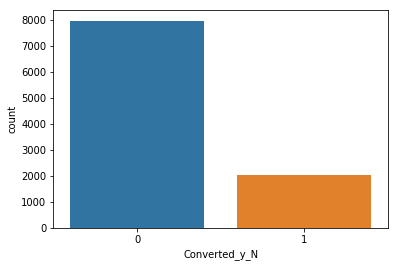

In [11]:
sns.countplot(df.Converted_y_N)

- We can notice that the data is imbalanced.
- The number of of 0's (Non-Converted) is 7963 and the number of 1's (Converted) is 2037
- Percentage wise lookup on the target variable (Converted_y_N):
    - 0 (Non-Converted) : 80%
    - 1 (Converted) : 20%

LEAD AGE ANALYSIS (Based on months since lead was generated)

In [12]:
print(df[df.Converted_y_N==1].months_since_lead_gen.value_counts(normalize=True))

4    0.369661
3    0.251841
5    0.241532
2    0.065292
6    0.062347
1    0.009327
Name: months_since_lead_gen, dtype: float64


In [13]:
df1=df[df.Converted_y_N==1]

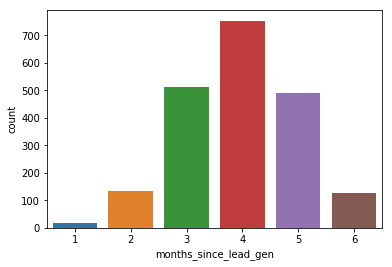

In [14]:
sns.countplot(df1.months_since_lead_gen)

- The maximum lead conversion took place in the 4th month after the lead was generated followed by the 3rd and 5th month.
- But analyzing the number of conversion month wise is not the perfect approach 

In [15]:
df0=df[df.Converted_y_N==0]

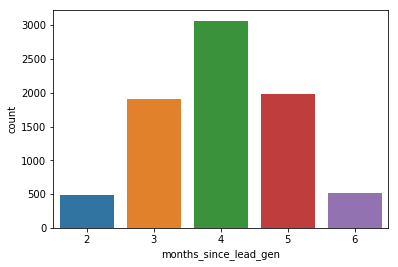

In [16]:
sns.countplot(df0.months_since_lead_gen)

- From a similar count plot for non conversion, we can identify that the maximum number of non-conversions also happens in the 4th month after the lead was generated.



- Now we can take a look at the conversion rate for each month, so that we can identify the best month for conversion.

In [17]:
print(df[df.months_since_lead_gen==1].Converted_y_N.value_counts(normalize=True))

1    1.0
Name: Converted_y_N, dtype: float64


In [18]:
print(df[df.months_since_lead_gen==2].Converted_y_N.value_counts(normalize=True))

0    0.786859
1    0.213141
Name: Converted_y_N, dtype: float64


In [19]:
print(df[df.months_since_lead_gen==3].Converted_y_N.value_counts(normalize=True))

0    0.788279
1    0.211721
Name: Converted_y_N, dtype: float64


In [20]:
print(df[df.months_since_lead_gen==4].Converted_y_N.value_counts(normalize=True))

0    0.802776
1    0.197224
Name: Converted_y_N, dtype: float64


In [21]:
print(df[df.months_since_lead_gen==5].Converted_y_N.value_counts(normalize=True))

0    0.80089
1    0.19911
Name: Converted_y_N, dtype: float64


In [22]:
print(df[df.months_since_lead_gen==6].Converted_y_N.value_counts(normalize=True))

0    0.803101
1    0.196899
Name: Converted_y_N, dtype: float64


From the above analysis we can infer that 
- IF we persuade the lead in the 1st month there is a 100% probability that the lead will convert. This is called a 'Hot Lead' in Marketing.
- From the second month after lead generation, the conversion rates are falling, and the conversion is around 20% on average

6M PRIOR ENQUIRY ANALYSIS 

In [23]:
print(df[df.is_6M_enquiry==1].Converted_y_N.value_counts(normalize=True))

0    0.857309
1    0.142691
Name: Converted_y_N, dtype: float64


In [24]:
print(df[df.is_6M_enquiry==0].Converted_y_N.value_counts(normalize=True))

0    0.731491
1    0.268509
Name: Converted_y_N, dtype: float64


In [25]:
print(df[df.Converted_y_N==1].is_6M_enquiry.value_counts(normalize=True))

0    0.639175
1    0.360825
Name: is_6M_enquiry, dtype: float64


In [26]:
print(df[df.Converted_y_N==0].is_6M_enquiry.value_counts(normalize=True))

1    0.554565
0    0.445435
Name: is_6M_enquiry, dtype: float64


- from the above analysis we can also find out that the enquiry affects the conversion to a certain degree
- We can see that nearly 37% of the leads who visited the website in the last 6 months have converted. This is a very positive sign for conversion and we can use this in the process of lead value processing. 

RECENT APP ACTIVITY ANALYSIS

In [27]:
print(df[df.is_3M_active==0].Converted_y_N.value_counts(normalize=True))

0    0.791851
1    0.208149
Name: Converted_y_N, dtype: float64


In [28]:
print(df[df.is_3M_active==1].Converted_y_N.value_counts(normalize=True))

0    0.798157
1    0.201843
Name: Converted_y_N, dtype: float64


- From the above analysis we can infer that the recent app activity does not influence the conversion rates

LEAD CHANNEL ANALYSIS

In [29]:
print(df[df.Converted_y_N==1].lead_gen_channel.value_counts(normalize=True))

Direct      0.399607
Networks    0.397644
Organic     0.202749
Name: lead_gen_channel, dtype: float64


In [30]:
print(df[df.Converted_y_N==0].lead_gen_channel.value_counts(normalize=True))

Networks    0.527942
Organic     0.259199
Direct      0.212859
Name: lead_gen_channel, dtype: float64


In [31]:
print(df[df.lead_gen_channel=='Direct'].Converted_y_N.value_counts(normalize=True))

0    0.675568
1    0.324432
Name: Converted_y_N, dtype: float64


In [32]:
print(df[df.lead_gen_channel=='Organic'].Converted_y_N.value_counts(normalize=True))

0    0.833266
1    0.166734
Name: Converted_y_N, dtype: float64


In [33]:
print(df[df.lead_gen_channel=='Networks'].Converted_y_N.value_counts(normalize=True))

0    0.838452
1    0.161548
Name: Converted_y_N, dtype: float64


- From the lead channel analysis we can infer that the leads generated through the Direct channel have a 2 times more chances of converting. So we can use this value for customer value generation

AIRLINE LOYALITY ANALYSIS

In [34]:
print(df[df.Converted_y_N==1].airline_loyalty_tier.value_counts(normalize=True))

None        0.464899
Base        0.225822
Silver      0.177221
Platinum    0.070201
Gold        0.061856
Name: airline_loyalty_tier, dtype: float64


In [35]:
print(df[df.Converted_y_N==0].airline_loyalty_tier.value_counts(normalize=True))

None        0.596132
Base        0.152204
Silver      0.138641
Platinum    0.057139
Gold        0.055883
Name: airline_loyalty_tier, dtype: float64


In [36]:
print(df[df.airline_loyalty_tier=='None'].Converted_y_N.value_counts(normalize=True))

0    0.833685
1    0.166315
Name: Converted_y_N, dtype: float64


In [37]:
print(df[df.airline_loyalty_tier=='Base'].Converted_y_N.value_counts(normalize=True))

0    0.72488
1    0.27512
Name: Converted_y_N, dtype: float64


In [38]:
print(df[df.airline_loyalty_tier=='Silver'].Converted_y_N.value_counts(normalize=True))

0    0.753584
1    0.246416
Name: Converted_y_N, dtype: float64


In [39]:
print(df[df.airline_loyalty_tier=='Platinum'].Converted_y_N.value_counts(normalize=True))

0    0.76087
1    0.23913
Name: Converted_y_N, dtype: float64


In [40]:
print(df[df.airline_loyalty_tier=='Gold'].Converted_y_N.value_counts(normalize=True))

0    0.779335
1    0.220665
Name: Converted_y_N, dtype: float64


- From the above analysis :
    - Users with any one of the loyality plans have a 50% higher probality for conversion with 'base' plan with the highest conversion rate.
    - Users without any loyality plans also have a positive conversion rate
    - We cab use this feature also for Customer value calculation.

GENDER ANALYSIS

In [41]:
print(df[df.Converted_y_N==1].Gender.value_counts(normalize=True))

Female    0.559156
Male      0.440844
Name: Gender, dtype: float64


In [42]:
print(df[df.Converted_y_N==0].Gender.value_counts(normalize=True))

Male      0.572523
Female    0.427477
Name: Gender, dtype: float64


In [43]:
print(df[df.Gender=='Male'].Converted_y_N.value_counts(normalize=True))

0    0.835441
1    0.164559
Name: Converted_y_N, dtype: float64


In [44]:
print(df[df.Gender=='Female'].Converted_y_N.value_counts(normalize=True))

0    0.749285
1    0.250715
Name: Converted_y_N, dtype: float64


- Females have a 50% more probability to convert

AGE ANALYSIS

In [45]:
print(df[df.Converted_y_N==1].Age.value_counts(normalize=True))

46    0.044674
40    0.043692
43    0.043201
45    0.042710
48    0.039273
42    0.037801
47    0.037801
49    0.036819
44    0.035837
39    0.035346
50    0.034855
41    0.033873
51    0.032401
52    0.031419
38    0.030928
37    0.030437
35    0.027982
36    0.026019
54    0.025037
56    0.024546
55    0.023564
33    0.021600
53    0.019637
57    0.018655
34    0.016200
31    0.016200
60    0.015709
32    0.015709
59    0.014728
58    0.014237
29    0.013746
30    0.011782
28    0.011291
62    0.010309
61    0.010309
63    0.008837
24    0.006873
26    0.006873
27    0.006382
64    0.005891
22    0.005891
65    0.003927
71    0.003436
66    0.003436
68    0.002946
23    0.002946
25    0.002946
67    0.002455
70    0.001964
21    0.001473
20    0.000982
18    0.000982
69    0.000982
74    0.000491
72    0.000491
73    0.000491
19    0.000491
84    0.000491
Name: Age, dtype: float64


In [46]:
print(df[df.Converted_y_N==0].Age.value_counts(normalize=True))

35    0.052367
37    0.052242
38    0.051990
34    0.051990
36    0.050609
33    0.049981
32    0.048474
31    0.046590
39    0.044079
40    0.043074
29    0.040186
30    0.038051
41    0.037298
28    0.031395
42    0.030642
43    0.026246
27    0.024614
26    0.023358
44    0.023107
25    0.018586
45    0.017832
46    0.016953
24    0.014819
47    0.012307
23    0.011679
48    0.011051
49    0.009042
22    0.009042
50    0.007912
51    0.006656
        ...   
61    0.004019
62    0.003893
60    0.003767
66    0.003516
19    0.003265
64    0.003140
63    0.002763
71    0.002512
72    0.002512
56    0.002512
18    0.002512
69    0.002512
74    0.002135
70    0.001758
68    0.001633
73    0.001507
76    0.001381
65    0.001256
77    0.001256
75    0.001130
78    0.000628
81    0.000502
79    0.000502
80    0.000377
92    0.000251
84    0.000126
88    0.000126
85    0.000126
82    0.000126
83    0.000126
Name: Age, Length: 70, dtype: float64


In [47]:
age_band=[]
age=df.Age
for i in age:
    if i < 20:
        age_band.append(1)
    elif i >= 20 and i <= 29:
        age_band.append(2)
    elif i >= 30 and i <= 39:
        age_band.append(3)
    elif i >= 40 and i <= 49:
        age_band.append(4)
    elif i >= 50 and i <= 59:
        age_band.append(5)
    elif i >= 60 and i <= 69:
        age_band.append(6)
    else:
        age_band.append(7)

In [48]:
len(age_band)

10000

In [49]:
df['age_band']=age_band

In [50]:
df.shape

(10000, 14)

In [51]:
print(df[df.Converted_y_N==1].age_band.value_counts(normalize=True))

4    0.395680
5    0.239077
3    0.232204
6    0.064801
2    0.059401
7    0.007364
1    0.001473
Name: age_band, dtype: float64


In [52]:
print(df[df.Converted_y_N==0].age_band.value_counts(normalize=True))

3    0.486374
4    0.227552
2    0.184729
5    0.047972
6    0.030516
7    0.017079
1    0.005777
Name: age_band, dtype: float64


In [53]:
print(df[df.age_band==1].Converted_y_N.value_counts(normalize=True))

0    0.938776
1    0.061224
Name: Converted_y_N, dtype: float64


In [54]:
print(df[df.age_band==2].Converted_y_N.value_counts(normalize=True))

0    0.923995
1    0.076005
Name: Converted_y_N, dtype: float64


In [55]:
print(df[df.age_band==3].Converted_y_N.value_counts(normalize=True))

0    0.891164
1    0.108836
Name: Converted_y_N, dtype: float64


In [56]:
print(df[df.age_band==4].Converted_y_N.value_counts(normalize=True))

0    0.692131
1    0.307869
Name: Converted_y_N, dtype: float64


In [57]:
print(df[df.age_band==5].Converted_y_N.value_counts(normalize=True))

1    0.560414
0    0.439586
Name: Converted_y_N, dtype: float64


In [58]:
print(df[df.age_band==6].Converted_y_N.value_counts(normalize=True))

0    0.648
1    0.352
Name: Converted_y_N, dtype: float64


In [59]:
print(df[df.age_band==7].Converted_y_N.value_counts(normalize=True))

0    0.900662
1    0.099338
Name: Converted_y_N, dtype: float64


C:\Users\Sebastian john\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


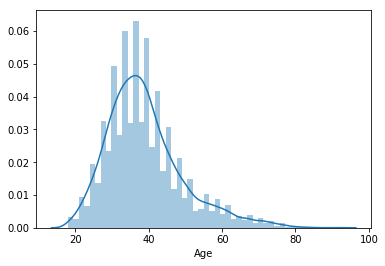

In [60]:
sns.distplot(age)

CITY ANALYSIS

In [61]:
print(df[df.Converted_y_N==1].City.value_counts(normalize=True))

Hyderabad     0.113893
Chandigarh    0.104566
Ahmedabad     0.104566
Chennai       0.102602
Delhi         0.099656
Bangalore     0.098675
Mumbai        0.096711
New Delhi     0.096220
Surat         0.086892
Cochin        0.049583
Kolkata       0.046637
Name: City, dtype: float64


In [62]:
print(df[df.Converted_y_N==0].City.value_counts(normalize=True))

Surat         0.106869
Bangalore     0.106367
Mumbai        0.103981
Chennai       0.100841
Hyderabad     0.100841
Chandigarh    0.099962
Delhi         0.098707
New Delhi     0.096823
Ahmedabad     0.096823
Cochin        0.048851
Kolkata       0.039935
Name: City, dtype: float64


In [63]:
print(df[df.City=='Hyderabad'].Converted_y_N.value_counts(normalize=True))

0    0.775845
1    0.224155
Name: Converted_y_N, dtype: float64


In [64]:
print(df[df.City=='Chandigarh'].Converted_y_N.value_counts(normalize=True))

0    0.7889
1    0.2111
Name: Converted_y_N, dtype: float64


In [65]:
print(df[df.City=='Ahmedabad'].Converted_y_N.value_counts(normalize=True))

0    0.783537
1    0.216463
Name: Converted_y_N, dtype: float64


In [66]:
print(df[df.City=='Chennai'].Converted_y_N.value_counts(normalize=True))

0    0.793478
1    0.206522
Name: Converted_y_N, dtype: float64


In [67]:
print(df[df.City=='Delhi'].Converted_y_N.value_counts(normalize=True))

0    0.794742
1    0.205258
Name: Converted_y_N, dtype: float64


In [68]:
print(df[df.City=='Bangalore'].Converted_y_N.value_counts(normalize=True))

0    0.808206
1    0.191794
Name: Converted_y_N, dtype: float64


In [69]:
print(df[df.City=='Mumbai'].Converted_y_N.value_counts(normalize=True))

0    0.807805
1    0.192195
Name: Converted_y_N, dtype: float64


In [70]:
print(df[df.City=='New Delhi'].Converted_y_N.value_counts(normalize=True))

0    0.797311
1    0.202689
Name: Converted_y_N, dtype: float64


In [71]:
print(df[df.City=='Surat'].Converted_y_N.value_counts(normalize=True))

0    0.827821
1    0.172179
Name: Converted_y_N, dtype: float64


In [72]:
print(df[df.City=='Cochin'].Converted_y_N.value_counts(normalize=True))

0    0.793878
1    0.206122
Name: Converted_y_N, dtype: float64


In [73]:
print(df[df.City=='Kolkata'].Converted_y_N.value_counts(normalize=True))

0    0.769976
1    0.230024
Name: Converted_y_N, dtype: float64


- from the above analysis All cities have a similar conversion rates

# Feature Engineering

- RFM SCORE (Receny, frequency, monetary)
- Lead Value
- Hot lead | warm lead

In [74]:
df.head()

,RowNumber,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N,age_band
0,1,15634602,Hargrave,4,Networks,Female,42,Bangalore,None,1,1,1,1,4
1,2,15647311,Hill,4,Organic,Female,41,Hyderabad,None,1,1,0,0,4
2,3,15619304,Onio,3,Networks,Female,42,Mumbai,Platinum,3,0,1,1,4
3,4,15701354,Boni,4,Networks,Female,39,Hyderabad,None,2,0,0,0,3
4,5,15737888,Mitchell,6,Organic,Female,43,Bangalore,Base,1,1,1,0,4


In [75]:
df.shape

(10000, 14)

- Based on the months since the lead was generated we can identify whether the lead is a hot lead or warm lead

In [76]:
lead_age=df.months_since_lead_gen

hot_lead=[]
warm_lead=[]

for i in lead_age:
    if i == 1:
        hot_lead.append(1)
    else:
        hot_lead.append(0)
        
for i in lead_age:
    if i > 1:
        warm_lead.append(1)
    else:
        warm_lead.append(0)

In [77]:
len(hot_lead)

10000

In [78]:
len(warm_lead)

10000

In [79]:
df['warm_lead']=warm_lead
df['hot_lead']=hot_lead

In [80]:
df.shape

(10000, 16)

In [81]:
df.head()

,RowNumber,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N,age_band,warm_lead,hot_lead
0,1,15634602,Hargrave,4,Networks,Female,42,Bangalore,None,1,1,1,1,4,1,0
1,2,15647311,Hill,4,Organic,Female,41,Hyderabad,None,1,1,0,0,4,1,0
2,3,15619304,Onio,3,Networks,Female,42,Mumbai,Platinum,3,0,1,1,4,1,0
3,4,15701354,Boni,4,Networks,Female,39,Hyderabad,None,2,0,0,0,3,1,0
4,5,15737888,Mitchell,6,Organic,Female,43,Bangalore,Base,1,1,1,0,4,1,0


In [82]:
df.hot_lead.value_counts()

0    9981
1      19
Name: hot_lead, dtype: int64

- Receny is calculated using the activity in the app in the last 3 months
- Frequency is calculated based on activity in the app in the last 3 months and activity in the website in the last 6 months.
- Monetary weight is calculated based on the airline_loyality_tier. Though this is not the best feature to decide the monetary value we have no other better feature that explains the monetary triat of the lead.

In [83]:
recency_weight=[]
frequency_weight1=[]
frequency_weight2=[]
monetary_weight=[]

three_month_acti=df.is_3M_active
six_month_acti=df.is_6M_enquiry
Mon_val=df.airline_loyalty_tier


for i in three_month_acti:
    if i == 1:
        recency_weight.append(2)
    elif i == 0 :
        recency_weight.append(1)
        
for i in six_month_acti:
    if i == 1:
        frequency_weight1.append(2)
    elif i == 0 :
        frequency_weight1.append(1)
        
for i in three_month_acti:
    if i == 1:
        frequency_weight2.append(2)
    elif i == 0 :
        frequency_weight2.append(1)
        
        
for i in Mon_val:
    if i == 'None':
        monetary_weight.append(1)
    elif i == 'Base':
        monetary_weight.append(2)
    elif i == 'Silver':
        monetary_weight.append(3)
    elif i == 'Gold':
        monetary_weight.append(4)
    elif i == 'Platinum':
        monetary_weight.append(5)

        
frequency_we=list(map(lambda x,y:x*y ,frequency_weight1,frequency_weight2))

In [84]:
df['recency_weight']=recency_weight
df['frequency_weight']=frequency_we
df['monetary_weight']=monetary_weight

In [85]:
df.shape

(10000, 19)

In [86]:
df.head()

,RowNumber,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N,age_band,warm_lead,hot_lead,recency_weight,frequency_weight,monetary_weight
0,1,15634602,Hargrave,4,Networks,Female,42,Bangalore,None,1,1,1,1,4,1,0,2,4,1
1,2,15647311,Hill,4,Organic,Female,41,Hyderabad,None,1,1,0,0,4,1,0,1,2,1
2,3,15619304,Onio,3,Networks,Female,42,Mumbai,Platinum,3,0,1,1,4,1,0,2,2,5
3,4,15701354,Boni,4,Networks,Female,39,Hyderabad,None,2,0,0,0,3,1,0,1,1,1
4,5,15737888,Mitchell,6,Organic,Female,43,Bangalore,Base,1,1,1,0,4,1,0,2,4,2


In [87]:
df['rfm_score']=df.recency_weight*df.frequency_weight*df.monetary_weight

In [88]:
df.shape

(10000, 20)

In [89]:
df.head()

,RowNumber,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N,age_band,warm_lead,hot_lead,recency_weight,frequency_weight,monetary_weight,rfm_score
0,1,15634602,Hargrave,4,Networks,Female,42,Bangalore,None,1,1,1,1,4,1,0,2,4,1,8
1,2,15647311,Hill,4,Organic,Female,41,Hyderabad,None,1,1,0,0,4,1,0,1,2,1,2
2,3,15619304,Onio,3,Networks,Female,42,Mumbai,Platinum,3,0,1,1,4,1,0,2,2,5,20
3,4,15701354,Boni,4,Networks,Female,39,Hyderabad,None,2,0,0,0,3,1,0,1,1,1,1
4,5,15737888,Mitchell,6,Organic,Female,43,Bangalore,Base,1,1,1,0,4,1,0,2,4,2,16


In [90]:
df.rfm_score.value_counts()

8     2729
4     2276
2     1132
16     810
1      790
12     532
24     516
6      221
20     208
40     205
32     200
3      196
10     100
5       85
Name: rfm_score, dtype: int64

After generating the rfm score we can remove the weights features associated with the rfm score

In [91]:
df=df.drop(['recency_weight','frequency_weight','monetary_weight'],axis=1)

In [92]:
df.shape

(10000, 17)

In [93]:
df.head()

,RowNumber,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N,age_band,warm_lead,hot_lead,rfm_score
0,1,15634602,Hargrave,4,Networks,Female,42,Bangalore,None,1,1,1,1,4,1,0,8
1,2,15647311,Hill,4,Organic,Female,41,Hyderabad,None,1,1,0,0,4,1,0,2
2,3,15619304,Onio,3,Networks,Female,42,Mumbai,Platinum,3,0,1,1,4,1,0,20
3,4,15701354,Boni,4,Networks,Female,39,Hyderabad,None,2,0,0,0,3,1,0,1
4,5,15737888,Mitchell,6,Organic,Female,43,Bangalore,Base,1,1,1,0,4,1,0,16


We can generate the lead value by multiplying the rfm score by lead's biological age weight and lead's age
- The weights are assigned based on the data analysis made.

In [94]:
lead_age=df.months_since_lead_gen
lead_age_weight=[]
lead_bio_age_weight=[]

for i in lead_age:
    if i == 1:
        lead_age_weight.append(5)
    elif i == 2 or i == 3: 
        lead_age_weight.append(3)
    elif i > 3:
        lead_age_weight.append(1)

        
for i in age_band:
    if i == 5 :
        lead_bio_age_weight.append(5)
    elif i == 4 or i == 6 :
        lead_bio_age_weight.append(4)
    elif i == 3 :
        lead_bio_age_weight.append(3)
    else:
        lead_bio_age_weight.append(1)

In [95]:
print(len(lead_age_weight))
print(len(lead_bio_age_weight))

10000
10000


In [96]:
df['lead_age_weight']=lead_age_weight
df['lead_bio_age_weight']=lead_bio_age_weight
df['lead_value']= df.rfm_score * df.lead_age_weight*df.lead_bio_age_weight

In [97]:
df.head()

,RowNumber,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N,age_band,warm_lead,hot_lead,rfm_score,lead_age_weight,lead_bio_age_weight,lead_value
0,1,15634602,Hargrave,4,Networks,Female,42,Bangalore,None,1,1,1,1,4,1,0,8,1,4,32
1,2,15647311,Hill,4,Organic,Female,41,Hyderabad,None,1,1,0,0,4,1,0,2,1,4,8
2,3,15619304,Onio,3,Networks,Female,42,Mumbai,Platinum,3,0,1,1,4,1,0,20,3,4,240
3,4,15701354,Boni,4,Networks,Female,39,Hyderabad,None,2,0,0,0,3,1,0,1,1,3,3
4,5,15737888,Mitchell,6,Organic,Female,43,Bangalore,Base,1,1,1,0,4,1,0,16,1,4,64


In [98]:
df.shape

(10000, 20)

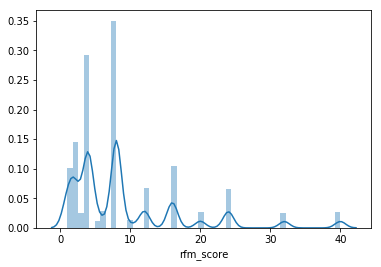

In [99]:
sns.distplot(df.rfm_score)

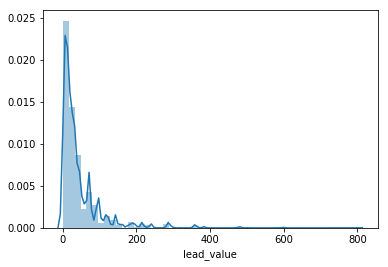

In [100]:
sns.distplot(df.lead_value)

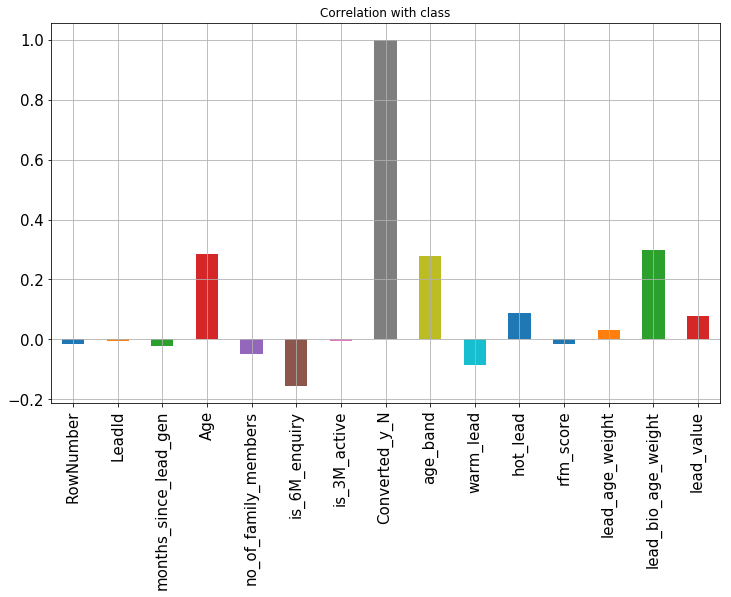

In [110]:
df.corrwith(df.Converted_y_N).plot.bar(
        figsize = (12,7), title = "Correlation with class", fontsize = 15,
        rot = 90, grid = True)

In [111]:
fd=df.copy()

# Data pre-processing (Along with further feature engineering)

In [792]:
df.head()

,RowNumber,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N,age_band,warm_lead,hot_lead,rfm_score,lead_age_weight,lead_bio_age_weight,lead_value
0,1,15634602,Hargrave,4,Networks,Female,42,Bangalore,None,1,1,1,1,4,1,0,8,1,4,32
1,2,15647311,Hill,4,Organic,Female,41,Hyderabad,None,1,1,0,0,4,1,0,2,1,4,8
2,3,15619304,Onio,3,Networks,Female,42,Mumbai,Platinum,3,0,1,1,4,1,0,20,3,4,240
3,4,15701354,Boni,4,Networks,Female,39,Hyderabad,None,2,0,0,0,3,1,0,1,1,3,3
4,5,15737888,Mitchell,6,Organic,Female,43,Bangalore,Base,1,1,1,0,4,1,0,16,1,4,64


In [793]:
df.shape

(10000, 20)

In [794]:
df.columns

Index(['RowNumber', 'LeadId', 'Surname', 'months_since_lead_gen',
       'lead_gen_channel', 'Gender', 'Age', 'City', 'airline_loyalty_tier',
       'no_of_family_members', 'is_6M_enquiry', 'is_3M_active',
       'Converted_y_N', 'age_band', 'warm_lead', 'hot_lead', 'rfm_score',
       'lead_age_weight', 'lead_bio_age_weight', 'lead_value'],
      dtype='object')

In [795]:
df=df.drop(['RowNumber','LeadId', 'Surname','lead_age_weight', 'lead_bio_age_weight'],axis=1)

In [796]:
df.head()

,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N,age_band,warm_lead,hot_lead,rfm_score,lead_value
0,4,Networks,Female,42,Bangalore,None,1,1,1,1,4,1,0,8,32
1,4,Organic,Female,41,Hyderabad,None,1,1,0,0,4,1,0,2,8
2,3,Networks,Female,42,Mumbai,Platinum,3,0,1,1,4,1,0,20,240
3,4,Networks,Female,39,Hyderabad,None,2,0,0,0,3,1,0,1,3
4,6,Organic,Female,43,Bangalore,Base,1,1,1,0,4,1,0,16,64


In [804]:
df.shape

(10000, 15)

In [801]:
# outlier identification and treatment on the continuous variables

#defining a simple user defined function for outlier detection
def outlier(data):
    o=[]
    ind=[]
    lis=[]
    for i in data:
        mean_data=data.mean()
        std_data=data.std()
        z_score=(i-mean_data)/std_data
        if np.abs(z_score)>3.5:
            ind=data[data==i].index
            lis.append(ind)
    print(len(lis))

We have considered 3.5 standard deviation as the outlier limit since we have nealy 10,000 data points

In [802]:
outlier(df["Age"])

45


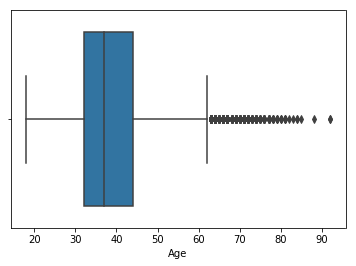

In [803]:
sns.boxplot(df["Age"])

- There are nearly 45 outlier values in the age column. We cannot drop them since they are critical to the business probelm. So we use the clipping method to clip them to the 99.7% quantile values
- From box plot we can also see that all the outliers are on the right exreme

In [807]:
# age
per1=df["Age"].quantile([0.003,0.997]).values
df["Age"]=np.clip(df["Age"],per1[0],per1[1])

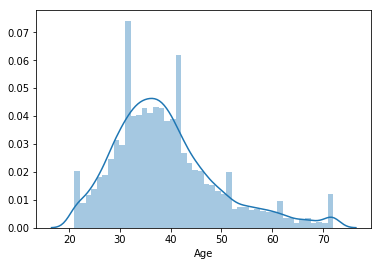

In [808]:
sns.distplot(df.Age)

In [809]:
df.shape

(10000, 15)

ONE HOT ENCODING

In [810]:
df=pd.get_dummies(df)

In [811]:
df.shape

(10000, 32)

In [812]:
df.head()

,months_since_lead_gen,Age,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N,age_band,warm_lead,hot_lead,rfm_score,...,City_Hyderabad,City_Kolkata,City_Mumbai,City_New Delhi,City_Surat,airline_loyalty_tier_Base,airline_loyalty_tier_Gold,airline_loyalty_tier_None,airline_loyalty_tier_Platinum,airline_loyalty_tier_Silver
0,4,42.0,1,1,1,1,4,1,0,8,...,0,0,0,0,0,0,0,1,0,0
1,4,41.0,1,1,0,0,4,1,0,2,...,1,0,0,0,0,0,0,1,0,0
2,3,42.0,3,0,1,1,4,1,0,20,...,0,0,1,0,0,0,0,0,1,0
3,4,39.0,2,0,0,0,3,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,6,43.0,1,1,1,0,4,1,0,16,...,0,0,0,0,0,1,0,0,0,0


SCALING THE CONTINUOUS VARIABLES

In [813]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [814]:
data=[df.Age, df.lead_value,df.rfm_score]
tr=pd.DataFrame(data)
tr=tr.T

In [815]:
tr.head()

,Age,lead_value,rfm_score
0,42.0,32.0,8.0
1,41.0,8.0,2.0
2,42.0,240.0,20.0
3,39.0,3.0,1.0
4,43.0,64.0,16.0


In [816]:
tr=sc.fit_transform(tr)

In [817]:
tr_df=pd.DataFrame(tr, columns=['age_trans','lead_value_trans','rfm_score_trans'])

In [818]:
tr_df.head()

,age_trans,lead_value_trans,rfm_score_trans
0,0.411765,0.038798,0.179487
1,0.392157,0.008761,0.025641
2,0.411765,0.299124,0.487179
3,0.352941,0.002503,0.000000
4,0.431373,0.078849,0.384615


In [819]:
df['age_trans']=tr_df.age_trans
df['lead_value_trans']=tr_df.lead_value_trans
df['rfm_score_trans']=tr_df.rfm_score_trans

In [820]:
df.shape

(10000, 35)

In [821]:
df.head()

,months_since_lead_gen,Age,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N,age_band,warm_lead,hot_lead,rfm_score,...,City_New Delhi,City_Surat,airline_loyalty_tier_Base,airline_loyalty_tier_Gold,airline_loyalty_tier_None,airline_loyalty_tier_Platinum,airline_loyalty_tier_Silver,age_trans,lead_value_trans,rfm_score_trans
0,4,42.0,1,1,1,1,4,1,0,8,...,0,0,0,0,1,0,0,0.411765,0.038798,0.179487
1,4,41.0,1,1,0,0,4,1,0,2,...,0,0,0,0,1,0,0,0.392157,0.008761,0.025641
2,3,42.0,3,0,1,1,4,1,0,20,...,0,0,0,0,0,1,0,0.411765,0.299124,0.487179
3,4,39.0,2,0,0,0,3,1,0,1,...,0,0,0,0,1,0,0,0.352941,0.002503,0.000000
4,6,43.0,1,1,1,0,4,1,0,16,...,0,0,1,0,0,0,0,0.431373,0.078849,0.384615


In [822]:
df=df.drop(['Age','lead_value','rfm_score'],axis=1)

In [823]:
df.head()

,months_since_lead_gen,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N,age_band,warm_lead,hot_lead,lead_gen_channel_Direct,lead_gen_channel_Networks,...,City_New Delhi,City_Surat,airline_loyalty_tier_Base,airline_loyalty_tier_Gold,airline_loyalty_tier_None,airline_loyalty_tier_Platinum,airline_loyalty_tier_Silver,age_trans,lead_value_trans,rfm_score_trans
0,4,1,1,1,1,4,1,0,0,1,...,0,0,0,0,1,0,0,0.411765,0.038798,0.179487
1,4,1,1,0,0,4,1,0,0,0,...,0,0,0,0,1,0,0,0.392157,0.008761,0.025641
2,3,3,0,1,1,4,1,0,0,1,...,0,0,0,0,0,1,0,0.411765,0.299124,0.487179
3,4,2,0,0,0,3,1,0,0,1,...,0,0,0,0,1,0,0,0.352941,0.002503,0.000000
4,6,1,1,1,0,4,1,0,0,0,...,0,0,1,0,0,0,0,0.431373,0.078849,0.384615


# Model Building

In [827]:
from sklearn.model_selection import train_test_split

In [828]:
X=df.drop(['Converted_y_N'], axis=1)
y=df.Converted_y_N

In [829]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3,random_state=0)

- Reason for using XGBoost

While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets. Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed. We can use tree based algorithms and gradient boosted tree based algorithms. XGBoost is an extreme gradient boosting algorithm based on trees that tends to perform very well out of the box compared to other ML algorithms.XGBoost also allows parallel processing. 

In [830]:
import xgboost as xgb

In [831]:
from xgboost.sklearn import XGBClassifier

In [832]:
bst=XGBClassifier()

In [833]:
bst.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [836]:
y1=bst.predict(xtest)

In [257]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

- Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:
    - Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
    - Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
    - Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
    - F1: Score: the weighted average of precision and recall.
    - AUC score best explains how many values we have correctly predicted

In [838]:
cm_xg=metrics.classification_report(ytest,y1)
acc_xg=metrics.accuracy_score(ytest,y1)
auc_xg=roc_auc_score(ytest,y1)
print(cm_xg)
print(acc_xg)
print(auc_xg)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.75      0.48      0.59       621

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000

0.8596666666666667
0.7205286595878185


Though the accuracy is around 86% the AUC score is around 72% only. We must try to optimize the model to attain an higher AUC score and F1 that is much better than these scores.

# feature importance using random forest

In [839]:
X=df.drop(['Converted_y_N'], axis=1)
y=df.Converted_y_N

In [860]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y, test_size=0.3,random_state=0)

In [861]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [863]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [864]:
y_pre_fi=rf.predict(xtest)

In [865]:
cm=metrics.classification_report(ytest,y_pre_fi)
acc=metrics.accuracy_score(ytest,y_pre_fi)
auc=roc_auc_score(ytest,y_pre_fi)
print(cm)
print(acc)
print(auc)

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2379
           1       0.68      0.47      0.56       621

    accuracy                           0.84      3000
   macro avg       0.78      0.71      0.73      3000
weighted avg       0.83      0.84      0.83      3000

0.8446666666666667
0.7063110591264546


In [866]:
feature_importances=(rf.feature_importances_)*100
columns=X.columns

In [867]:
columns

Index(['months_since_lead_gen', 'no_of_family_members', 'is_6M_enquiry',
       'is_3M_active', 'age_band', 'warm_lead', 'hot_lead',
       'lead_gen_channel_Direct', 'lead_gen_channel_Networks',
       'lead_gen_channel_Organic', 'Gender_Female', 'Gender_Male',
       'City_Ahmedabad', 'City_Bangalore', 'City_Chandigarh', 'City_Chennai',
       'City_Cochin', 'City_Delhi', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai', 'City_New Delhi', 'City_Surat',
       'airline_loyalty_tier_Base', 'airline_loyalty_tier_Gold',
       'airline_loyalty_tier_None', 'airline_loyalty_tier_Platinum',
       'airline_loyalty_tier_Silver', 'age_trans', 'lead_value_trans',
       'rfm_score_trans'],
      dtype='object')

In [868]:
fe=pd.DataFrame(feature_importances,columns)

In [869]:
fe

,0
months_since_lead_gen,6.953240
no_of_family_members,13.879714
is_6M_enquiry,3.791324
is_3M_active,1.345092
age_band,7.336043
warm_lead,0.301042
hot_lead,0.227584
lead_gen_channel_Direct,2.155115
lead_gen_channel_Networks,1.828485
lead_gen_channel_Organic,1.715807


In [870]:
fe.shape

(31, 1)

Creating a new dataframe based on the important features alone

In [873]:
new_df=df[['months_since_lead_gen','no_of_family_members','age_trans','lead_value_trans','rfm_score_trans','is_6M_enquiry','Converted_y_N','age_band']]

In [874]:
new_df.shape

(10000, 8)

Rebuilding the model with the new dataframe

In [875]:
x=new_df.drop(['Converted_y_N'], axis=1)
y=new_df.Converted_y_N
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.25,random_state=0)

In [876]:
bst=XGBClassifier()

In [877]:
bst.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [878]:
y2=bst.predict(xtest)

In [879]:
cm_xg2=metrics.classification_report(ytest,y2)
acc_xg2=metrics.accuracy_score(ytest,y2)
auc_xg2=roc_auc_score(ytest,y2)
print(cm_xg2)
print(acc_xg2)
print(auc_xg2)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1991
           1       0.78      0.44      0.57       509

    accuracy                           0.86      2500
   macro avg       0.83      0.71      0.74      2500
weighted avg       0.85      0.86      0.85      2500

0.8612
0.7059316038084937


We can see that the accuracy and went up and other results of F1 score and AUC scores are also similar. Thus the feature importance steps has improved the process.

# Polynomial transformation for New dataframe

In [880]:
from sklearn.preprocessing import PolynomialFeatures

In [881]:
x=new_df.drop(['Converted_y_N'], axis=1)
y=new_df.Converted_y_N

In [882]:
poly=PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

In [883]:
z=poly.fit_transform(x)

In [884]:
x=pd.DataFrame(z)

In [885]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,4.0,1.0,0.411765,0.038798,0.179487,1.0,4.0,4.0,1.647059,0.155194,...,0.015976,0.073906,0.411765,1.647059,0.006964,0.038798,0.155194,0.179487,0.717949,4.0
1,4.0,1.0,0.392157,0.008761,0.025641,1.0,4.0,4.0,1.568627,0.035044,...,0.003436,0.010055,0.392157,1.568627,0.000225,0.008761,0.035044,0.025641,0.102564,4.0
2,3.0,3.0,0.411765,0.299124,0.487179,0.0,4.0,9.0,1.235294,0.897372,...,0.123169,0.200603,0.000000,1.647059,0.145727,0.000000,1.196496,0.000000,1.948718,0.0
3,4.0,2.0,0.352941,0.002503,0.000000,0.0,3.0,8.0,1.411765,0.010013,...,0.000883,0.000000,0.000000,1.058824,0.000000,0.000000,0.007509,0.000000,0.000000,0.0
4,6.0,1.0,0.431373,0.078849,0.384615,1.0,4.0,6.0,2.588235,0.473091,...,0.034013,0.165913,0.431373,1.725490,0.030326,0.078849,0.315394,0.384615,1.538462,4.0


In [886]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Converted_y_N, dtype: int64

In [887]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.25,random_state=0)

In [892]:
bst3=XGBClassifier()

In [893]:
bst3.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [894]:
y3=bst3.predict(xtest)

In [895]:
cm_xg3=metrics.classification_report(ytest,y3)
acc_xg3=metrics.accuracy_score(ytest,y3)
auc_xg3=roc_auc_score(ytest,y3)
print(cm_xg3)
print(acc_xg3)
print(auc_xg3)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1991
           1       0.75      0.47      0.58       509

    accuracy                           0.86      2500
   macro avg       0.81      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500

0.86
0.7154148481526398


# Model Tuning

In [896]:
from sklearn.model_selection import GridSearchCV

In [897]:
param={'max_depth':np.arange(1,20), 'n_estimators':np.arange(1,20)}

In [898]:
gs=GridSearchCV(bst3,param,cv=3,scoring='recall')
gs.fit(x,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimator

- Objective : This defines the loss function to be minimized. We use binary:logistic –logistic regression for binary classification, returns predicted probability
- If we define gamma = 0 then the working will be the same as a gradient boosting model
- lambda = 1 uses L2 regularization term on weights (analogous to Ridge regression)
- Evaluation metrics is set to auc
- Since we want the model to learn vigourously we set the learning rate to 1

In [930]:
bst4=XGBClassifier(learning_rate=1, verbosity=1, max_depth=7 ,objective='binary:logistic',n_estimators=12,
                  gamma=1,max_delta_step=0.5,alpha=1, eval_metric='auc')

In [931]:
xtrain.shape

(7500, 28)

In [932]:
bst4.fit(xtrain,ytrain)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=1, learning_rate=1, max_delta_step=0.5, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=12, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [933]:
y4=bst4.predict(xtest)

In [934]:
cm_xg4=metrics.classification_report(ytest,y4)
acc_xg4=metrics.accuracy_score(ytest,y4)
auc_xg4=roc_auc_score(ytest,y4)
print(cm_xg4)
print(acc_xg4)
print(auc_xg4)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1991
           1       0.71      0.50      0.59       509

    accuracy                           0.86      2500
   macro avg       0.80      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500

0.8568
0.7229112538841288


# Upsampling using SMOTE (Due to imbalanced data)

In [935]:
from imblearn.over_sampling import SMOTE

In [936]:
sm = SMOTE(random_state=27, ratio=1)
X_train, y_train = sm.fit_sample(xtrain, ytrain)

In [983]:
bst5=XGBClassifier(learning_rate=1, verbosity=1, max_depth=4 ,objective='binary:logistic',n_estimators=20,
                  gamma=1,max_delta_step=0.5,alpha=1, eval_metric='auc', kernel='rbf')

In [984]:
X_train=pd.DataFrame(X_train, columns=x.columns)

In [985]:
bst5.fit(X_train,y_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=1, kernel='rbf', learning_rate=1, max_delta_step=0.5,
              max_depth=4, min_child_weight=1, missing=None, n_estimators=20,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [986]:
y5=bst5.predict(xtest)

In [987]:
cm_xg5=metrics.classification_report(ytest,y5)
acc_xg5=metrics.accuracy_score(ytest,y5)
auc_xg5=roc_auc_score(ytest,y5)
print(cm_xg5)
print(acc_xg5)
print(auc_xg5)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1991
           1       0.52      0.67      0.59       509

    accuracy                           0.81      2500
   macro avg       0.72      0.76      0.73      2500
weighted avg       0.83      0.81      0.82      2500

0.808
0.7580803201834582


FINAL SCORE :

- accuracy : 81%
- Weighted F1 : 82%
- AUC : 76%

We have optimized the model yet the model fails to learn better and recognize the hidden pattern in the data for conversion. Yet this is not a bad model. This is very well generalized model and does not overfit and has a good AUC score for an imbalanced dataset. 

# Final Propensity scoring 

In [988]:
y6=bst5.predict_proba(xtest)

In [989]:
prob_conv=[]

for i in y6:
    prob_conv.append(round(i[1]*100))

In [990]:
prob_conv

[34.0,
 41.0,
 41.0,
 60.0,
 8.0,
 93.0,
 8.0,
 7.0,
 36.0,
 98.0,
 6.0,
 13.0,
 25.0,
 27.0,
 85.0,
 39.0,
 22.0,
 36.0,
 29.0,
 7.0,
 68.0,
 1.0,
 12.0,
 26.0,
 5.0,
 36.0,
 2.0,
 2.0,
 38.0,
 70.0,
 15.0,
 69.0,
 16.0,
 6.0,
 29.0,
 11.0,
 1.0,
 5.0,
 12.0,
 26.0,
 24.0,
 55.0,
 63.0,
 13.0,
 63.0,
 25.0,
 71.0,
 40.0,
 68.0,
 3.0,
 98.0,
 21.0,
 37.0,
 4.0,
 23.0,
 8.0,
 41.0,
 12.0,
 86.0,
 47.0,
 5.0,
 19.0,
 8.0,
 26.0,
 95.0,
 95.0,
 49.0,
 72.0,
 11.0,
 95.0,
 88.0,
 9.0,
 4.0,
 92.0,
 55.0,
 32.0,
 98.0,
 5.0,
 19.0,
 37.0,
 96.0,
 21.0,
 14.0,
 41.0,
 65.0,
 4.0,
 6.0,
 20.0,
 95.0,
 6.0,
 19.0,
 57.0,
 18.0,
 79.0,
 9.0,
 56.0,
 6.0,
 15.0,
 35.0,
 15.0,
 3.0,
 46.0,
 20.0,
 33.0,
 85.0,
 20.0,
 11.0,
 33.0,
 73.0,
 39.0,
 51.0,
 98.0,
 66.0,
 28.0,
 81.0,
 17.0,
 4.0,
 2.0,
 54.0,
 11.0,
 42.0,
 44.0,
 80.0,
 41.0,
 6.0,
 83.0,
 29.0,
 26.0,
 69.0,
 37.0,
 5.0,
 34.0,
 55.0,
 4.0,
 22.0,
 40.0,
 10.0,
 71.0,
 5.0,
 9.0,
 9.0,
 31.0,
 78.0,
 13.0,
 35.0,
 54.0,
 38.0,
 89.0

In [991]:
conv_prob_score=[]

for i in prob_conv:
    if i in range(0,11):
        conv_prob_score.append(1)
    elif i in range(11,21):
        conv_prob_score.append(2)
    elif i in range(21,31):
        conv_prob_score.append(3)
    elif i in range(31,41):
        conv_prob_score.append(4)
    elif i in range(41,51):
        conv_prob_score.append(5)
    elif i in range(51,61):
        conv_prob_score.append(6)
    elif i in range(61,71):
        conv_prob_score.append(7)
    elif i in range(71,81):
        conv_prob_score.append(8)
    elif i in range(81,91):
        conv_prob_score.append(9)
    elif i in range(91,101):
        conv_prob_score.append(10)

In [992]:
len(conv_prob_score)

2500

Text(0.5, 1.0, 'Customer propensity score range deciles')

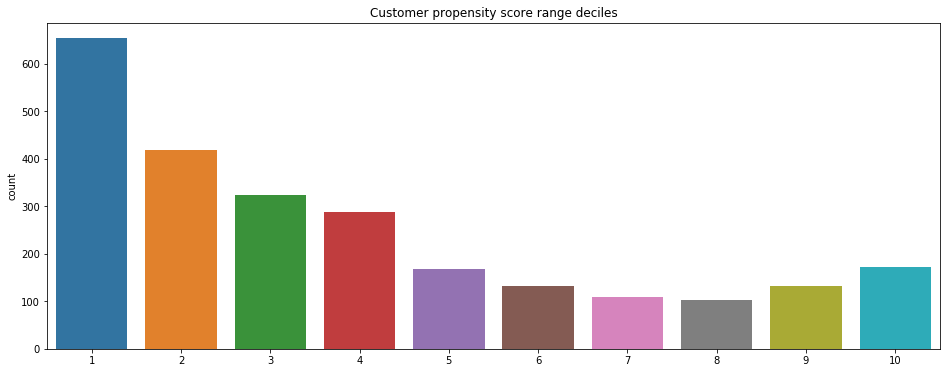

In [994]:
plt.figure(figsize=(16, 6))
sns.countplot(conv_prob_score).set_title('Customer propensity score range deciles')

In [995]:
conv_prob_score=pd.Series(conv_prob_score)

In [996]:
conv_prob_score.value_counts()

1     654
2     418
3     323
4     288
10    173
5     168
9     133
6     132
7     109
8     102
dtype: int64

In [997]:
conv_prob_score.value_counts(normalize=True)

1     0.2616
2     0.1672
3     0.1292
4     0.1152
10    0.0692
5     0.0672
9     0.0532
6     0.0528
7     0.0436
8     0.0408
dtype: float64

- Neraly 26% of the test leads have the probability of converting more than 50%
- neraly 12% have a very strong probability to convert

# Exporting the required docs

In [1004]:
train_final= pd.concat([xtrain,ytrain], axis=1)

In [1005]:
train_final.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Converted_y_N
2967,3.0,3.0,0.352941,0.021277,0.025641,0.0,3.0,9.0,1.058824,0.063830,...,0.009050,0.000000,1.058824,0.000546,0.000000,0.063830,0.000000,0.076923,0.0,1
700,5.0,2.0,0.215686,0.013767,0.076923,0.0,3.0,10.0,1.078431,0.068836,...,0.016591,0.000000,0.647059,0.001059,0.000000,0.041302,0.000000,0.230769,0.0,0
3481,5.0,2.0,0.254902,0.028786,0.179487,1.0,3.0,10.0,1.274510,0.143930,...,0.045752,0.254902,0.764706,0.005167,0.028786,0.086358,0.179487,0.538462,3.0,0
1621,4.0,1.0,0.333333,0.028786,0.179487,1.0,3.0,4.0,1.333333,0.115144,...,0.059829,0.333333,1.000000,0.005167,0.028786,0.086358,0.179487,0.538462,3.0,1
800,4.0,2.0,0.607843,0.048811,0.179487,1.0,5.0,8.0,2.431373,0.195244,...,0.109100,0.607843,3.039216,0.008761,0.048811,0.244055,0.179487,0.897436,5.0,0


In [1006]:
test_final=xtest.copy()

In [1007]:
test_final.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
9394,3.0,1.0,0.274510,0.269086,0.589744,1.0,3.0,3.0,0.823529,0.807259,...,0.073867,0.161890,0.274510,0.823529,0.158692,0.269086,0.807259,0.589744,1.769231,3.0
898,3.0,1.0,0.372549,0.058824,0.076923,0.0,4.0,3.0,1.117647,0.176471,...,0.021915,0.028658,0.000000,1.490196,0.004525,0.000000,0.235294,0.000000,0.307692,0.0
2398,5.0,1.0,0.411765,0.038798,0.179487,1.0,4.0,5.0,2.058824,0.193992,...,0.015976,0.073906,0.411765,1.647059,0.006964,0.038798,0.155194,0.179487,0.717949,4.0
5906,5.0,1.0,0.215686,0.006258,0.025641,0.0,3.0,5.0,1.078431,0.031289,...,0.001350,0.005530,0.000000,0.647059,0.000160,0.000000,0.018773,0.000000,0.076923,0.0
2343,5.0,2.0,0.333333,0.148936,1.000000,1.0,3.0,10.0,1.666667,0.744681,...,0.049645,0.333333,0.333333,1.000000,0.148936,0.148936,0.446809,1.000000,3.000000,3.0


In [1008]:
test_final.to_csv('test_final.csv',header=True)
train_final.to_csv('train_final.csv',header=True)

In [1009]:
import pickle

In [1010]:
filename = 'finalized_model.pkl'
pickle.dump(bst5, open(filename, 'wb'))

In [1012]:
#checking the pickle file:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.808


____________________________________________________________________________________________________________________________
----------------------------------------------------------------------------------------------------------------------------

In [113]:
fd['recency_weight']=recency_weight
fd['frequency_weight']=frequency_we
fd['monetary_weight']=monetary_weight

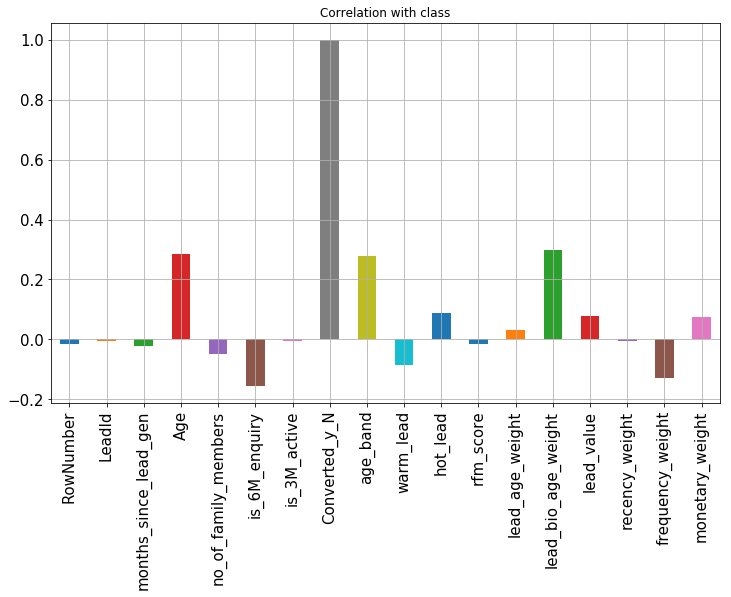

In [114]:
fd.corrwith(df.Converted_y_N).plot.bar(
        figsize = (12,7), title = "Correlation with class", fontsize = 15,
        rot = 90, grid = True)

In [119]:
fdn=fd[['Age','is_6M_enquiry','age_band','hot_lead','warm_lead','lead_bio_age_weight','lead_value','frequency_weight','monetary_weight','Converted_y_N']]

In [120]:
fdn.head()

,Age,is_6M_enquiry,age_band,hot_lead,warm_lead,lead_bio_age_weight,lead_value,frequency_weight,monetary_weight,Converted_y_N
0,42,1,4,0,1,4,32,4,1,1
1,41,1,4,0,1,4,8,2,1,0
2,42,0,4,0,1,4,240,2,5,1
3,39,0,3,0,1,3,3,1,1,0
4,43,1,4,0,1,4,64,4,2,0


In [127]:
fdn.shape

(10000, 10)